In [1]:
import pandas as pd
import numpy as np

train_set_images = pd.read_csv('train.csv')


Text(0.5,1,'1')

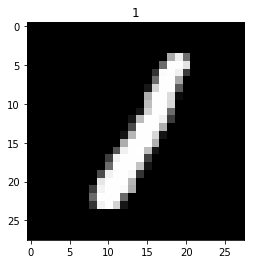

In [2]:
import matplotlib.pyplot as plt, matplotlib.image as mpimg
%matplotlib inline

# Let's draw some image
random_example = np.random.randint(0, len(train_set_images) - 1, 1)
some_number = train_set_images.iloc[random_example[0]]
pixels = some_number[1:].values.reshape((28,28))
plt.imshow(pixels,cmap='gray')
plt.title(some_number[0])

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

clf = MLPClassifier(solver='sgd', alpha=0.0001, hidden_layer_sizes=(100, 100, 100), random_state=1, verbose=10)
labels = train_set_images['label']
pixels = train_set_images.iloc[:,1:]
pixels_train, pixels_test, labels_train, labels_test = train_test_split(pixels,labels, test_size= 0.2, random_state=27)
clf.fit(pixels_train, labels_train)


Iteration 1, loss = 2.05397915
Iteration 2, loss = 0.50300715
Iteration 3, loss = 0.38362578
Iteration 4, loss = 0.33085456
Iteration 5, loss = 0.29622017
Iteration 6, loss = 0.27155840
Iteration 7, loss = 0.25090221
Iteration 8, loss = 0.23470179
Iteration 9, loss = 0.22308254
Iteration 10, loss = 0.21131451
Iteration 11, loss = 0.19961856
Iteration 12, loss = 0.19045727
Iteration 13, loss = 0.18411217
Iteration 14, loss = 0.17586198
Iteration 15, loss = 0.16909343
Iteration 16, loss = 0.16364244
Iteration 17, loss = 0.15873972
Iteration 18, loss = 0.15407355
Iteration 19, loss = 0.14868977
Iteration 20, loss = 0.14342816
Iteration 21, loss = 0.14003347
Iteration 22, loss = 0.13524540
Iteration 23, loss = 0.13124641
Iteration 24, loss = 0.12856419
Iteration 25, loss = 0.12500996
Iteration 26, loss = 0.12287063
Iteration 27, loss = 0.11857572
Iteration 28, loss = 0.11545597
Iteration 29, loss = 0.11286648
Iteration 30, loss = 0.11057731
Iteration 31, loss = 0.10720763
Iteration 32, los

In [ ]:
predictions = clf.predict(pixels_test)
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, predictions)

In [ ]:
test_set_images = pd.read_csv('test.csv')
predictions_test_set = clf.predict(test_set_images)
df = pd.DataFrame(predictions_test_set)
df.index.name='ImageId'
df.index+=1
df.columns=['Label']
df.to_csv('results.csv', header=True, index = True, index_label = 'ImageId')